In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 3.1MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=b4ceb44e9892c66e5b3664e1ce18d9f416c641b147e3d7040f268593873e7987
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
import PyPDF2
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 1. Data extraction

In [ ]:
filename = '/content/drive/My Drive/PMBOKGuide_5th_Ed.pdf'
open_filename = open(filename, 'rb')
ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [ ]:
ind_manifesto.getDocumentInfo()

{'/CreationDate': "D:20121220154602-05'00'",
 '/ModDate': "D:20130221141314+02'00'",
 '/Producer': 'Creo Normalizer JTP'}

In [ ]:
total_pages = ind_manifesto.numPages
total_pages

616

In [ ]:
!pip install textract

     |████████████████████████████████| 112kB 6.5MB/s 
     |████████████████████████████████| 102kB 6.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 8.9MB 12.1MB/s 
     |████████████████████████████████| 5.6MB 44.0MB/s 
     |████████████████████████████████| 112kB 45.5MB/s 
     |████████████████████████████████| 32.8MB 124kB/s 
     |████████████████████████████████| 112kB 49.6MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 153kB 43.4MB/s 
     |████████████████████████████████| 13.7MB 325kB/s 
  Created wheel for EbookLib: filename=EbookLib-0.17.1-cp36-none-any.whl size=38163 sha256=4e4855e0fd1193a89cd48fb981d650477f62f1980dc72a7f8a087832de3c60bc
  Stored in directory: /root/.cache/pip/wheels/84/11/01/951369cbbf8f96878786a1f4da68bd7ac19a5d945b38e03d54
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp36-none-any.whl size=275707 sha256=fbee8cdc85f5eca27cf4f0a15f115

In [ ]:
def extract(subject):
    s=subject.lower()
    if s=="project scope management":
        start= 130
        end= 166
    elif s=="project time management":
        start=166
        end=218  
    else: 
        start=218
        end=252
    text  = ''
    # Lets loop through, to read each page from the pdf file
    while(start < end):
        # Get the specified number of pages in the document
        mani_page  = ind_manifesto.getPage(start)
        # Process the next page
        start += 1
        # Extract the text from the page
        text += mani_page.extractText()
    return text


In [ ]:
ptm = extract("project time management")
ptm

'141©2013 Project Management Institute.\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition \n6 - PROJECT TIME MANAGEMENT6PROJECT TIME MA\nNAGEMENTProject Time Management includes the processes required to manage the timely completion of the project.\n\nFigure 6-1 provides an overview of the Project Time Management processes, which are as follows:\n6.1  Plan Schedule ManagementŠThe process of establishing the policies, procedures, and documentation \n\nfor planning, developing, managing, executing, and controlling the project schedule.\n6.2  Define Activities\nŠThe process of identifying and documenting the speci˜c actions to be performed to produce the project deliverables.6.3  Sequence Activities\nŠThe process of identifying and documenting relationships among the project \n\nactivities.6.4  Estimate Activity ResourcesŠThe process of estimating the type and quantities of material, human \nresources, equipment, or supplies required to perform each ac

In [ ]:
pcm = extract("project cost management")
pcm

'193©2013 Project Management Institute.\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition \n7 - PROJECT COST MANAGEMENT7PROJECT COST MANAGEMENTProject Cost Management includes the processes involved in planning, estimating, budgeting, ˜nancing, funding, \nmanaging, and controlling costs so that the project can be completed within the approved budget.\nFigure 7-1 provides an overview of the following Project Cost Management processes:\n7.1  Plan Cost ManagementŠThe process that establishes the policies, procedures, and documentation \nfor planning, managing, expending, and controlling project costs.\n7.2  Estimate CostsŠThe process of developing an approximation of the monetary resources needed to \ncomplete project activities.7.3  Determine Budget\nŠThe process of aggregating the estimated costs of individual activities or work \npackages to establish an authorized cost baseline.\n7.4  Control CostsŠThe process of monitoring the status of the projec

In [ ]:
psm=extract("project scope management")
psm

'105©2013 Project Management Institute.\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition \n5 - PROJECT SCOPE MANAGEMENT5PROJECT SCOPE MANAGEMENTProject Scope Management includes the processes required to ensure that the project includes all the work \nrequired, and only the work required, to complete the project successfully. Managing the project scope is primarily \n\nconcerned with de˜ning and controlling what is and is not included in the project.\nFigure 5-1 provides an overview of the Project Scope Management processes, which include the following:\n5.1  Plan Scope ManagementŠThe process of creating a scope management plan that documents how \n\nthe project scope will be de˜ned, validated, and controlled.\n5.2  Collect RequirementsŠThe process of determining, documenting, and managing stakeholder needs \nand requirements to meet project objectives.5.3 Define ScopeŠThe process of developing a detailed description of the project and product.5.4 

In [ ]:
#concaténation
text=psm+ptm+pcm
text

'105©2013 Project Management Institute.\n A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition \n5 - PROJECT SCOPE MANAGEMENT5PROJECT SCOPE MANAGEMENTProject Scope Management includes the processes required to ensure that the project includes all the work \nrequired, and only the work required, to complete the project successfully. Managing the project scope is primarily \n\nconcerned with de˜ning and controlling what is and is not included in the project.\nFigure 5-1 provides an overview of the Project Scope Management processes, which include the following:\n5.1  Plan Scope ManagementŠThe process of creating a scope management plan that documents how \n\nthe project scope will be de˜ned, validated, and controlled.\n5.2  Collect RequirementsŠThe process of determining, documenting, and managing stakeholder needs \nand requirements to meet project objectives.5.3 Define ScopeŠThe process of developing a detailed description of the project and product.5.4 

# 2. Data preprocessing

## 2.1 Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
sentences = sent_tokenize(text)
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
words;

In [ ]:
sentences

['105©2013 Project Management Institute.',
 'A Guide to the Project Management Body of Knowledge (PMBOK\n® Guide) Œ Fifth Edition \n5 - PROJECT SCOPE MANAGEMENT5PROJECT SCOPE MANAGEMENTProject Scope Management includes the processes required to ensure that the project includes all the work \nrequired, and only the work required, to complete the project successfully.',
 'Managing the project scope is primarily \n\nconcerned with de˜ning and controlling what is and is not included in the project.',
 'Figure 5-1 provides an overview of the Project Scope Management processes, which include the following:\n5.1  Plan Scope ManagementŠThe process of creating a scope management plan that documents how \n\nthe project scope will be de˜ned, validated, and controlled.',
 '5.2  Collect RequirementsŠThe process of determining, documenting, and managing stakeholder needs \nand requirements to meet project objectives.5.3 Define ScopeŠThe process of developing a detailed description of the project and

## 2.2 Remove indesired ponctuation 

In [ ]:
import string
def remove_punctuation(text):
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
no_ponc=remove_punctuation(text)

## 2.3 Remove stopwords

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english')) - set(['is a'])
corpus=[]
def stopwords(text):

    
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    text = [word.lower() for word in text.split() if word.lower() not in sw]
   
    j=" ".join(text)
    corpus.append(j)
    return j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
no_stop=stopwords(no_ponc)

In [ ]:
no_stop

'project management institute guide project management body knowledge pmbok guide fifth edition project scope management project scope managementproject scope management includes processes required ensure project includes work required work required complete project successfully managing project scope primarily concerned de ning controlling included project figure provides overview project scope management processes include following plan scope management process creating scope management plan documents project scope de ned validated controlled collect requirements process determining documenting managing stakeholder needs requirements meet project objectives define scope process developing detailed description project product create wbs process subdividing project deliverables project work smaller manageable components validate scope process formalizing acceptance completed project deliverables control scope process monitoring status project product scope managing changes scope baseli

## 2.4 Lemmetization and Stemming

In [ ]:
import gensim
import nltk
nltk.download('wordnet')
from nltk.stem import SnowballStemmer,WordNetLemmatizer
def lemmatize_stemming(text):
    stemmer=SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
processed = preprocess(no_stop)
processed

['project',
 'manag',
 'institut',
 'guid',
 'project',
 'manag',
 'bodi',
 'knowledg',
 'pmbok',
 'guid',
 'fifth',
 'edit',
 'project',
 'scope',
 'manag',
 'project',
 'scope',
 'scope',
 'manag',
 'includ',
 'process',
 'requir',
 'ensur',
 'project',
 'includ',
 'work',
 'requir',
 'work',
 'requir',
 'complet',
 'project',
 'success',
 'manag',
 'project',
 'scope',
 'primarili',
 'concern',
 'ning',
 'control',
 'includ',
 'project',
 'figur',
 'provid',
 'overview',
 'project',
 'scope',
 'manag',
 'process',
 'includ',
 'follow',
 'plan',
 'scope',
 'manag',
 'process',
 'creat',
 'scope',
 'manag',
 'plan',
 'document',
 'project',
 'scope',
 'valid',
 'control',
 'collect',
 'requir',
 'process',
 'determin',
 'document',
 'manag',
 'stakehold',
 'need',
 'requir',
 'meet',
 'project',
 'object',
 'defin',
 'scope',
 'process',
 'develop',
 'detail',
 'descript',
 'project',
 'product',
 'creat',
 'process',
 'subdivid',
 'project',
 'deliver',
 'project',
 'work',
 'smaller

## 2.5 POS Tagging

In [ ]:
tags=nltk.pos_tag(processed)

In [ ]:
tags

[('project', 'NN'),
 ('manag', 'NN'),
 ('institut', 'NN'),
 ('guid', 'NN'),
 ('project', 'NN'),
 ('manag', 'NN'),
 ('bodi', 'NN'),
 ('knowledg', 'NN'),
 ('pmbok', 'NN'),
 ('guid', 'NN'),
 ('fifth', 'NN'),
 ('edit', 'NN'),
 ('project', 'NN'),
 ('scope', 'NN'),
 ('manag', 'NN'),
 ('project', 'NN'),
 ('scope', 'NN'),
 ('scope', 'NN'),
 ('manag', 'NN'),
 ('includ', 'NN'),
 ('process', 'NN'),
 ('requir', 'NN'),
 ('ensur', 'NN'),
 ('project', 'NN'),
 ('includ', 'JJ'),
 ('work', 'NN'),
 ('requir', 'NN'),
 ('work', 'NN'),
 ('requir', 'NN'),
 ('complet', 'NN'),
 ('project', 'NN'),
 ('success', 'NN'),
 ('manag', 'NN'),
 ('project', 'NN'),
 ('scope', 'NN'),
 ('primarili', 'NN'),
 ('concern', 'NN'),
 ('ning', 'VBG'),
 ('control', 'NN'),
 ('includ', 'NN'),
 ('project', 'NN'),
 ('figur', 'VBZ'),
 ('provid', 'JJ'),
 ('overview', 'NN'),
 ('project', 'NN'),
 ('scope', 'NN'),
 ('manag', 'NN'),
 ('process', 'NN'),
 ('includ', 'NN'),
 ('follow', 'VBP'),
 ('plan', 'NN'),
 ('scope', 'VBP'),
 ('manag', 'JJ')

## 2.6 Chunking

In [ ]:
import nltk
grammar="NP:{<DT>?<JJ>*<NN>}"
parser=nltk.RegexpParser(grammar)
output=parser.parse(tags)
print(output)
#output.draw()

(S
  (NP project/NN)
  (NP manag/NN)
  (NP institut/NN)
  (NP guid/NN)
  (NP project/NN)
  (NP manag/NN)
  (NP bodi/NN)
  (NP knowledg/NN)
  (NP pmbok/NN)
  (NP guid/NN)
  (NP fifth/NN)
  (NP edit/NN)
  (NP project/NN)
  (NP scope/NN)
  (NP manag/NN)
  (NP project/NN)
  (NP scope/NN)
  (NP scope/NN)
  (NP manag/NN)
  (NP includ/NN)
  (NP process/NN)
  (NP requir/NN)
  (NP ensur/NN)
  (NP project/NN)
  (NP includ/JJ work/NN)
  (NP requir/NN)
  (NP work/NN)
  (NP requir/NN)
  (NP complet/NN)
  (NP project/NN)
  (NP success/NN)
  (NP manag/NN)
  (NP project/NN)
  (NP scope/NN)
  (NP primarili/NN)
  (NP concern/NN)
  ning/VBG
  (NP control/NN)
  (NP includ/NN)
  (NP project/NN)
  figur/VBZ
  (NP provid/JJ overview/NN)
  (NP project/NN)
  (NP scope/NN)
  (NP manag/NN)
  (NP process/NN)
  (NP includ/NN)
  follow/VBP
  (NP plan/NN)
  scope/VBP
  (NP manag/JJ process/NN)
  (NP creat/NN)
  (NP scope/NN)
  (NP manag/NN)
  (NP plan/NN)
  (NP document/NN)
  (NP project/NN)
  (NP scope/NN)
  (NP va

## 2.7 TF-IDF

# 4. Bag of words

In [ ]:
dictionary = gensim.corpora.Dictionary([no_stop.split()])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

        

0 aa
1 abbreviated
2 ability
3 able
4 abstract
5 ac
6 accelerating
7 acceptable
8 acceptance
9 accepted
10 accepts


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# 5. Doc2bow

In [ ]:
import gensim
from gensim import corpora
bow_corpus = [dictionary.doc2bow(doc) for doc in [no_stop.split()]]

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary([no_stop.split()])
# convert tokenized documents into a document-term matrix
bow_corpus = [dictionary.doc2bow(text) for text in [no_stop.split()]]

In [ ]:
list(dictionary.values())

['aa',
 'abbreviated',
 'ability',
 'able',
 'abstract',
 'ac',
 'accelerating',
 'acceptable',
 'acceptance',
 'accepted',
 'accepts',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accordance',
 'according',
 'account',
 'accounting',
 'accounts',
 'accumulate',
 'accumulated',
 'accuracy',
 'accurate',
 'accurately',
 'acd',
 'achievable',
 'achieve',
 'achieved',
 'achieving',
 'acknowledging',
 'acquire',
 'acquired',
 'acquireproject',
 'acquisition',
 'across',
 'acted',
 'action',
 'actions',
 'active',
 'activities',
 'activitiesde',
 'activitiessequence',
 'activity',
 'activitydurations',
 'activitydurationsa',
 'activityidentifier',
 'activityonnode',
 'activityresources',
 'activityresourcesfigure',
 'actors',
 'actual',
 'actually',
 'adapt',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressed',
 'adds',
 'adjust',
 'adjusted',
 'adjusting',
 'adjustment',
 'adjustments',
 'adjusts',
 'administrat

In [ ]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("aa") appears 1 time.
Word 1 ("abbreviated") appears 1 time.
Word 2 ("ability") appears 3 time.
Word 3 ("able") appears 4 time.
Word 4 ("abstract") appears 1 time.
Word 5 ("ac") appears 24 time.
Word 6 ("accelerating") appears 1 time.
Word 7 ("acceptable") appears 9 time.
Word 8 ("acceptance") appears 19 time.
Word 9 ("accepted") appears 14 time.
Word 10 ("accepts") appears 1 time.
Word 11 ("accompany") appears 1 time.
Word 12 ("accomplish") appears 3 time.
Word 13 ("accomplished") appears 11 time.
Word 14 ("accomplishing") appears 1 time.
Word 15 ("accomplishment") appears 1 time.
Word 16 ("accordance") appears 1 time.
Word 17 ("according") appears 3 time.
Word 18 ("account") appears 20 time.
Word 19 ("accounting") appears 5 time.
Word 20 ("accounts") appears 10 time.
Word 21 ("accumulate") appears 1 time.
Word 22 ("accumulated") appears 1 time.
Word 23 ("accuracy") appears 20 time.
Word 24 ("accurate") appears 8 time.
Word 25 ("accurately") appears 1 time.
Word 26 ("acd") app

In [ ]:
import pandas as pd
df = pd.DataFrame([no_stop])
df.columns = ['script']
df.index = ['index']
df

,script
index,project management institute guide project man...


In [ ]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [ ]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,aa,abbreviated,ability,able,abstract,ac,accelerating,acceptable,acceptance,accepted,accepts,accompany,accomplish,accomplished,accomplishing,accomplishment,accordance,according,account,accounting,accounts,accumulate,accumulated,accuracy,accurate,accurately,acd,achievable,achieve,achieved,achieving,acknowledging,acquire,acquired,acquireproject,acquisition,acted,action,actions,active,...,voice,voting,waits,walkthroughs,warning,warranting,wave,way,ways,wbs,wbscreate,webpages,weekly,weeks,weight,weighted,welldocumented,wellfacilitated,whatif,whenhistorical,wide,widely,winformationproject,withheld,wno,wo,words,work,working,works,workshop,workshops,workweek,worstcase,writing,written,xed,yards,yen,zero
index,1,1,3,4,1,24,1,9,19,14,1,1,3,11,1,1,1,3,20,5,10,1,1,20,8,1,1,2,4,4,1,1,1,2,3,1,1,18,12,2,...,1,2,1,1,1,1,6,10,7,106,1,1,1,8,3,1,1,1,4,1,1,2,1,2,1,1,1,263,4,3,2,9,1,3,4,1,2,2,1,5


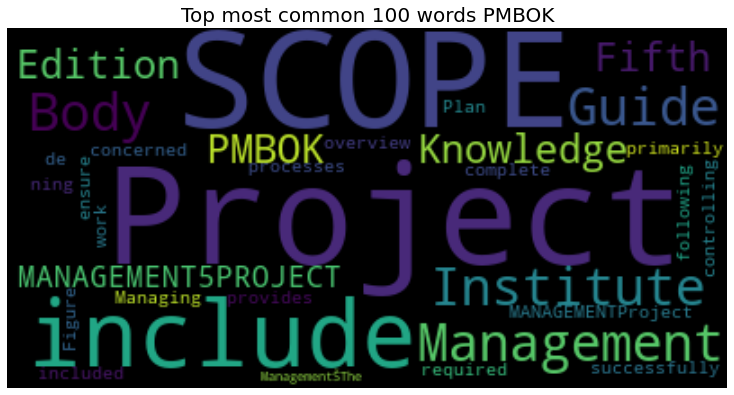

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words PMBOK",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('PMBOK_cost_time_scop_top_100.jpeg')

# 6. TF-ID

In [ ]:
import gensim.downloader as api
from gensim import corpora, models
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)


TypeError: ignored

In [ ]:
sentences = nltk.sent_tokenize(no_stop)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(tokenizer=processed_docs, stop_words='english')
all_word_vectors = word_vectorizer.fit_transform(for sent in sentences)

SyntaxError: ignored

In [ ]:
£print(corpus_tfidf

TfidfModel(num_docs=1, num_nnz=2600)


# 7. LDA

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary,chunksize=100,iterations=25, passes=2, workers=4)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.049*"project" + 0.033*"management" + 0.019*"schedule" + 0.013*"activity" + 0.012*"process" + 0.011*"plan" + 0.010*"work" + 0.010*"pmi" + 0.010*"scope" + 0.010*"cost"
Topic: 1 
Words: 0.031*"project" + 0.015*"management" + 0.010*"schedule" + 0.009*"cost" + 0.008*"scope" + 0.007*"pmi" + 0.007*"guide" + 0.007*"activity" + 0.006*"work" + 0.006*"process"
Topic: 2 
Words: 0.027*"project" + 0.016*"management" + 0.012*"cost" + 0.011*"schedule" + 0.009*"scope" + 0.008*"activity" + 0.007*"work" + 0.007*"process" + 0.007*"requirements" + 0.006*"pmi"
Topic: 3 
Words: 0.033*"project" + 0.030*"management" + 0.014*"schedule" + 0.010*"scope" + 0.010*"cost" + 0.009*"work" + 0.009*"activity" + 0.006*"pmi" + 0.006*"guide" + 0.006*"process"
Topic: 4 
Words: 0.031*"project" + 0.020*"management" + 0.016*"schedule" + 0.012*"scope" + 0.010*"work" + 0.009*"activity" + 0.008*"process" + 0.008*"cost" + 0.007*"pmi" + 0.007*"section"
Topic: 5 
Words: 0.032*"project" + 0.016*"management" + 0.013*

# 8. LDA + TF_ID

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary,chunksize=100,iterations=25, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"planfigure" + 0.000*"planned" + 0.000*"placed" + 0.000*"placing" + 0.000*"plan" + 0.000*"plana" + 0.000*"planasp" + 0.000*"plancumulative" + 0.000*"plandescribed" + 0.000*"physical"
Topic: 1 Word: 0.000*"planfigure" + 0.000*"planned" + 0.000*"placed" + 0.000*"placing" + 0.000*"plan" + 0.000*"plana" + 0.000*"planasp" + 0.000*"plancumulative" + 0.000*"plandescribed" + 0.000*"physical"
Topic: 2 Word: 0.000*"planfigure" + 0.000*"planned" + 0.000*"placed" + 0.000*"placing" + 0.000*"plan" + 0.000*"plana" + 0.000*"planasp" + 0.000*"plancumulative" + 0.000*"plandescribed" + 0.000*"physical"
Topic: 3 Word: 0.000*"planfigure" + 0.000*"planned" + 0.000*"placed" + 0.000*"placing" + 0.000*"plan" + 0.000*"plana" + 0.000*"planasp" + 0.000*"plancumulative" + 0.000*"plandescribed" + 0.000*"physical"
Topic: 4 Word: 0.000*"planfigure" + 0.000*"planned" + 0.000*"placed" + 0.000*"placing" + 0.000*"plan" + 0.000*"plana" + 0.000*"planasp" + 0.000*"plancumulative" + 0.000*"plandescribed"

# 9. Evaluation

## Evaluation using LDA Bag of Words model

In [ ]:
for index, score in sorted(lda_model[bow_corpus[14]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6330733299255371	 
Topic: 0.171*"mang" + 0.148*"froid" + 0.129*"tout" + 0.122*"personnel" + 0.099*"frit" + 0.063*"restaur" + 0.059*"command" + 0.050*"sandwich" + 0.050*"serv" + 0.032*"cest"

Score: 0.2335716336965561	 
Topic: 0.171*"sal" + 0.128*"tabl" + 0.115*"attent" + 0.102*"personnel" + 0.071*"plus" + 0.065*"serv" + 0.061*"froid" + 0.058*"sandwich" + 0.051*"manqu" + 0.047*"command"

Score: 0.016672134399414062	 
Topic: 0.144*"command" + 0.114*"pass" + 0.110*"frit" + 0.100*"driv" + 0.093*"attent" + 0.083*"restaur" + 0.076*"personnel" + 0.038*"cest" + 0.035*"manqu" + 0.034*"toujour"

Score: 0.016672035679221153	 
Topic: 0.209*"tout" + 0.128*"cest" + 0.099*"command" + 0.097*"froid" + 0.079*"mang" + 0.076*"sandwich" + 0.075*"plus" + 0.045*"frit" + 0.034*"personnel" + 0.029*"pass"

Score: 0.01666986756026745	 
Topic: 0.302*"command" + 0.134*"driv" + 0.088*"fois" + 0.078*"personnel" + 0.055*"restaur" + 0.046*"mang" + 0.046*"tout" + 0.034*"attent" + 0.034*"cest" + 0.029*"manqu"


## Evaluation using LDA TF-IDF model

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[14]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))



Score: 0.8499695658683777	 
Topic: 0.173*"tout" + 0.150*"froid" + 0.095*"sandwich" + 0.095*"serv" + 0.093*"command" + 0.059*"mang" + 0.049*"personnel" + 0.041*"sal" + 0.040*"attent" + 0.036*"frit"

Score: 0.0166741032153368	 
Topic: 0.158*"plus" + 0.154*"attent" + 0.128*"restaur" + 0.102*"command" + 0.065*"serv" + 0.057*"personnel" + 0.051*"pass" + 0.051*"manqu" + 0.034*"mang" + 0.032*"tout"

Score: 0.01667359285056591	 
Topic: 0.243*"personnel" + 0.140*"command" + 0.097*"pass" + 0.079*"pir" + 0.077*"driv" + 0.064*"sal" + 0.055*"fois" + 0.047*"toujour" + 0.027*"cest" + 0.024*"mang"

Score: 0.016670508310198784	 
Topic: 0.265*"froid" + 0.186*"mang" + 0.134*"sandwich" + 0.078*"toujour" + 0.070*"cest" + 0.068*"restaur" + 0.029*"command" + 0.026*"client" + 0.024*"attent" + 0.022*"manqu"

Score: 0.01667034812271595	 
Topic: 0.166*"cest" + 0.148*"sal" + 0.102*"client" + 0.090*"personnel" + 0.079*"tabl" + 0.074*"command" + 0.065*"pass" + 0.056*"plus" + 0.054*"restaur" + 0.043*"attent"

Score

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.21666423868157847


#  10.Test

In [ ]:
unseen_document = "j'aime tout au macdo , fast food, endroit et atmosphère sont magnifiques "
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499685406684875	 Topic: 0.209*"tout" + 0.128*"cest" + 0.099*"command" + 0.097*"froid" + 0.079*"mang"
Score: 0.05001497641205788	 Topic: 0.171*"mang" + 0.148*"froid" + 0.129*"tout" + 0.122*"personnel" + 0.099*"frit"
Score: 0.05000494793057442	 Topic: 0.309*"froid" + 0.085*"command" + 0.082*"sandwich" + 0.078*"toujour" + 0.062*"fois"
Score: 0.05000436678528786	 Topic: 0.302*"command" + 0.134*"driv" + 0.088*"fois" + 0.078*"personnel" + 0.055*"restaur"
Score: 0.050003375858068466	 Topic: 0.134*"toujour" + 0.115*"pir" + 0.099*"pass" + 0.075*"cest" + 0.075*"tabl"
Score: 0.050002824515104294	 Topic: 0.171*"sal" + 0.128*"tabl" + 0.115*"attent" + 0.102*"personnel" + 0.071*"plus"
Score: 0.05000067874789238	 Topic: 0.144*"command" + 0.114*"pass" + 0.110*"frit" + 0.100*"driv" + 0.093*"attent"
Score: 0.050000227987766266	 Topic: 0.146*"plus" + 0.119*"fois" + 0.112*"driv" + 0.110*"pir" + 0.101*"frit"
Score: 0.05000005289912224	 Topic: 0.170*"command" + 0.136*"manqu" + 0.085*"toujour" + 0.0

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.21666423868157847


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


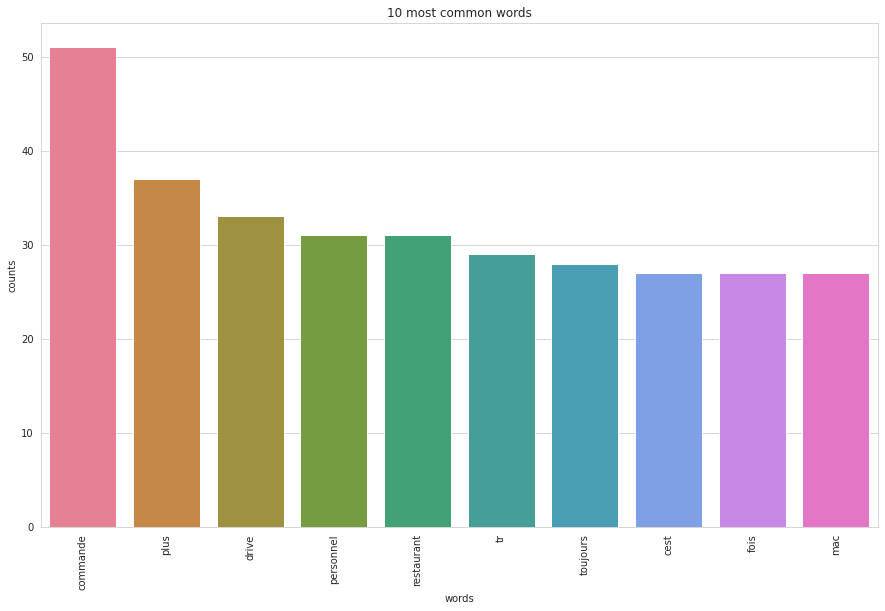

In [ ]:
 #Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=['french'])
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['review_body'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)